## Import Library


In [62]:
import numpy as np 
import pandas as pd  
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, roc_auc_score, roc_curve, 
                             matthews_corrcoef, log_loss)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re
from sklearn.base import BaseEstimator, TransformerMixin
from itertools import product
import time
from sklearn.ensemble import VotingClassifier
from tqdm import tqdm
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import precision_score, recall_score, f1_score

## Cek Dataset

In [39]:
df1 = pd.read_csv('../Dataset/phishing_email.csv')
df1.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


In [40]:
df1 = pd.read_csv('../Dataset/CEAS_08.csv')
df1.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [41]:
df1 = pd.read_csv('../Dataset/Ling.csv')
df1.head()

,subject,body,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [42]:
df1 = pd.read_csv('../Dataset/Enron.csv')
df1.head()

,subject,body,label
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...",0
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,0
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,0


In [43]:
df1 = pd.read_csv('../Dataset/Nazario.csv')
df1.head(2)


,sender,receiver,date,subject,body,urls,label
0,Mail System Internal Data <MAILER-DAEMON@monke...,NaN,28 Sep 2017 09:57:25 -0400,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA,This text is part of the internal format of yo...,1,1
1,cPanel <service@cpanel.com>,jose@monkey.org,"Fri, 30 Oct 2015 00:00:48 -0500",Verify Your Account,Business with \t\t\t\t\t\t\t\tcPanel & WHM \t...,1,1


In [44]:
df1 = pd.read_csv('../Dataset/Nigerian_Fraud.csv')
df1.head(2)

,sender,receiver,date,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 02:38:20 +0000",URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,0,1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,"Thu, 31 Oct 2002 05:10:00 -0000",URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",0,1


Dataset yang sama kolomnya

In [45]:
base_path = "/home/rul/Kuliah/Important Shii/Capstone/Dataset"
input_paths = []

import os
for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        input_paths.append(os.path.join(dirname, filename))

/home/rul/Kuliah/Important Shii/Capstone/Dataset/Nazario.csv
/home/rul/Kuliah/Important Shii/Capstone/Dataset/Enron.csv
/home/rul/Kuliah/Important Shii/Capstone/Dataset/CEAS_08.csv
/home/rul/Kuliah/Important Shii/Capstone/Dataset/phishing_email.csv
/home/rul/Kuliah/Important Shii/Capstone/Dataset/SpamAssasin.csv
/home/rul/Kuliah/Important Shii/Capstone/Dataset/Nigerian_Fraud.csv
/home/rul/Kuliah/Important Shii/Capstone/Dataset/Ling.csv
/home/rul/Kuliah/Important Shii/Capstone/Dataset/toREad.md


In [46]:
datasets_to_remove = [
    "/home/rul/Kuliah/Important Shii/Capstone/Dataset/phishing_email.csv",
    "/home/rul/Kuliah/Important Shii/Capstone/Dataset/Enron.csv",
    "/home/rul/Kuliah/Important Shii/Capstone/Dataset/Ling.csv"
]

for dataset in datasets_to_remove:
    if dataset in input_paths:
        input_paths.remove(dataset)
        print(f"Removed: {dataset}")
    else:
        print(f"Not found: {dataset}")

Removed: /home/rul/Kuliah/Important Shii/Capstone/Dataset/phishing_email.csv
Removed: /home/rul/Kuliah/Important Shii/Capstone/Dataset/Enron.csv
Removed: /home/rul/Kuliah/Important Shii/Capstone/Dataset/Ling.csv


In [47]:
dataframes = []
for path in input_paths:
    try:
        df = pd.read_csv(path)
        dataframes.append(df)
        print(f"Successfully loaded: {path}")
    except Exception as e:
        print(f"Error loading {path}: {str(e)}")

Successfully loaded: /home/rul/Kuliah/Important Shii/Capstone/Dataset/Nazario.csv
Successfully loaded: /home/rul/Kuliah/Important Shii/Capstone/Dataset/CEAS_08.csv
Successfully loaded: /home/rul/Kuliah/Important Shii/Capstone/Dataset/SpamAssasin.csv
Successfully loaded: /home/rul/Kuliah/Important Shii/Capstone/Dataset/Nigerian_Fraud.csv
Error loading /home/rul/Kuliah/Important Shii/Capstone/Dataset/toREad.md: No columns to parse from file


In [48]:
if dataframes:
    df = pd.concat(dataframes, axis=0, ignore_index=True)
    df.reset_index(drop=True, inplace=True)
    
    print("\nData berhasil digabungkan!")
    print(f"Total rows: {len(df)}")
    print(f"Columns: {df.columns.tolist()}")
else:
    print("Tidak ada dataset yang berhasil dimuat!")


Data berhasil digabungkan!
Total rows: 49860
Columns: ['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']


In [49]:
df.head()

,sender,receiver,date,subject,body,urls,label
0,Mail System Internal Data <MAILER-DAEMON@monke...,NaN,28 Sep 2017 09:57:25 -0400,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA,This text is part of the internal format of yo...,1,1
1,cPanel <service@cpanel.com>,jose@monkey.org,"Fri, 30 Oct 2015 00:00:48 -0500",Verify Your Account,Business with \t\t\t\t\t\t\t\tcPanel & WHM \t...,1,1
2,Microsoft Outlook <recepcao@unimedceara.com.br>,NaN,"Fri, 30 Oct 2015 06:21:59 -0300 (BRT)",Helpdesk Mailbox Alert!!!,Your two incoming mails were placed on pending...,1,1
3,Ann Garcia <AnGarcia@mcoe.org>,"""info@maaaaa.org"" <info@maaaaa.org>","Fri, 30 Oct 2015 14:54:33 +0000",IT-Service Help Desk,Password will expire in 3 days. Click Here To ...,0,1
4,"""USAA"" <usaaacctupdate@sccu4u.com>",Recipients <usaaacctupdate@sccu4u.com>,"Fri, 30 Oct 2015 14:02:33 -0500",Final USAA Reminder - Update Your Account Now,"To ensure delivery to your inbox, please add U...",1,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49860 entries, 0 to 49859
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    49529 non-null  object
 1   receiver  47768 non-null  object
 2   date      49377 non-null  object
 3   subject   49773 non-null  object
 4   body      49859 non-null  object
 5   urls      49860 non-null  int64 
 6   label     49860 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [51]:
df.describe()

,urls,label
count,49860.000000,49860.000000
mean,0.678018,0.570738
std,0.467241,0.494976
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


<Axes: >

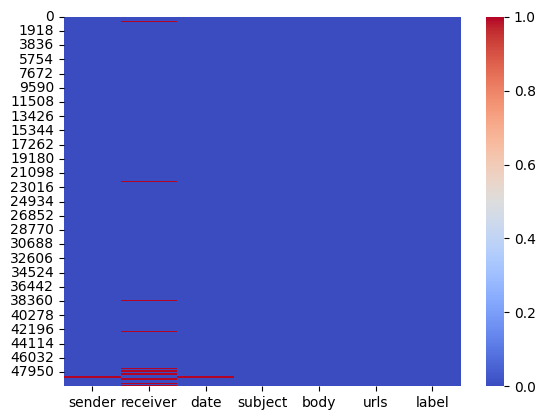

In [52]:
sns.heatmap(df.isnull(), cmap="coolwarm")

Split Data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis=1), df["label"], random_state=42)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37395 entries, 1441 to 15795
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    37147 non-null  object
 1   receiver  35838 non-null  object
 2   date      37035 non-null  object
 3   subject   37326 non-null  object
 4   body      37394 non-null  object
 5   urls      37395 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.0+ MB


In [55]:
X_train.describe(include=["object"])

,sender,receiver,date,subject,body
count,37147,35838,37035,37326,37394
unique,24192,5432,36609,18577,37392
top,qydlqcws-iacfym@issues.apache.org,user6@gvc.ceas-challenge.cc,"Thu, 07 Aug 2008 21:38:18 -0100",CNN.com Daily Top 10,\n\n
freq,338,1033,5,2202,3


In [56]:
phishing_emails = X_train[y_train == 1]
non_phishing_emails = X_train[y_train == 0]

In [59]:
def plot_wordcloud(text_series, title):
    # 1. Konversi ke string dan handle missing values
    text_series = text_series.astype(str)  # Konversi semua ke string
    text_series = text_series.replace('nan', '')  # Ganti 'nan' dengan string kosong
    
    # 2. Gabungkan semua teks
    all_text = ' '.join(text_series)
    
    # 3. Generate dan plot wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()


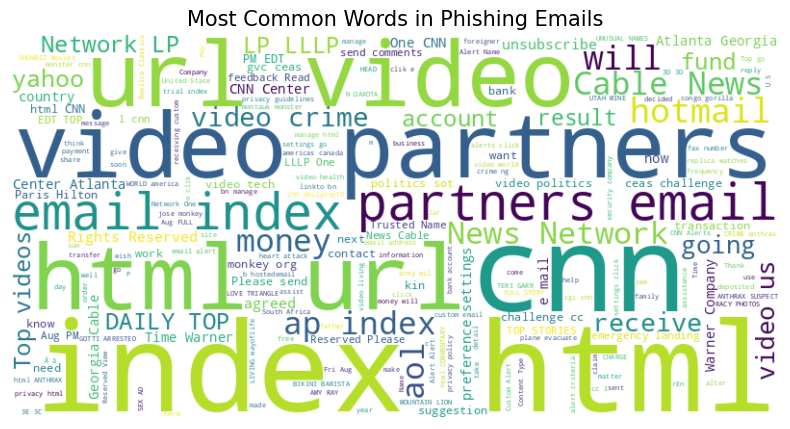

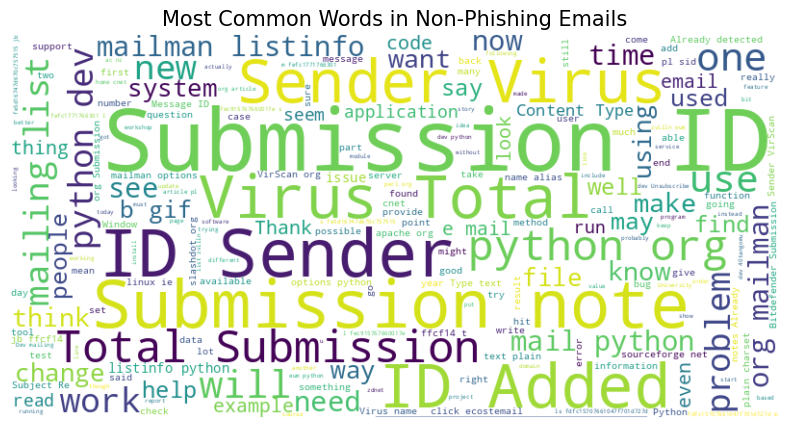

In [60]:
plot_wordcloud(phishing_emails["body"], "Most Common Words in Phishing Emails")
plot_wordcloud(non_phishing_emails["body"], "Most Common Words in Non-Phishing Emails")

In [ ]:
class DropNaBodyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column="body"):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            return X.dropna(subset=[self.column])
        else:
            raise ValueError("Input must be a pandas DataFrame")